In [1]:
from math import factorial
import numpy as np
from itertools import combinations_with_replacement
import time
from grad_descent import grad_descent
from function_generation.PolynomialGenerator import PolynomialGenerator
from experiments.utils.generate_quadratics import generate_quadratic
from experiments.utils.get_lipschitz import get_lipschitz
from line_searches.Constant import Constant
from line_searches.QuasiWolfe import QuasiWolfe
from line_searches.StrongWolfe import StrongWolfe
from line_searches.MoreThuente import MoreThuente
import matplotlib.pyplot as plt
from experiments.utils.miscellaneous import smooth_running_mean




In [2]:
a = np.zeros((10000,5000,5))
print(a.nbytes/1e6)

2000.0


In [3]:


# max_steps = 100000
# epsilons = 10 ** np.linspace(-0.5, -6, 100)
# # epsilons = [1e-6]
# bounds =[-1,1]
# sw = StrongWolfe()
# mt = MoreThuente()
# qw = QuasiWolfe()
#
#
# stopping_conditions = ["grad", "x", "y"]
#
#
# dim =3
# degree = 2
# x0 = np.random.uniform(-1,1,dim)
# # f,g,h = PolynomialGenerator().generate(dim, degree, all_positive=False)
# f,g,h, = generate_quadratic(dim)
#
#
# # coefficents = np.random.uniform(0,1, dim)
# #
# # def f(x):
# #     return np.sum(coefficents*x**2)
# #
# # def g(x):
# #     return 2*coefficents*x
#
#
#
#
#
#
#
# stopping_condition = stopping_conditions[0]
# l1 = np.max(np.abs(np.linalg.eigvals(h())))
# record_trace = True
# const = Constant(1/l1)
#
#
#   # 0,       1           2               3          4          5            6
# # steps, step_count, f_calls_count, g_calls_count, end, gradients, objective_values
#
# counts = np.zeros(len(epsilons))
#
#
# cum_step_count = 0
# start = x0
# for i,e in enumerate(epsilons):
#
#     if i == len(epsilons)-1:
#         print("last iteration")
#         record_trace = True
#
#         res = grad_descent(f,g,x0,epsilon=e, record_trace=record_trace, record_gradients=record_trace,record_objective_values=record_trace, learning_rate=const, constraints=bounds, termination_criterion=stopping_condition,max_steps=max_steps, nesterov=False, verbose=False)
#         counts[i] = res[1]
#     else:
#         record_trace = False
#         res = grad_descent(f,g,start,epsilon=e, record_trace=record_trace, record_gradients=record_trace,record_objective_values=record_trace, learning_rate=const, constraints=bounds, termination_criterion=stopping_condition, max_steps=max_steps, nesterov=False, verbose=False)
#         cum_step_count += res[1]
#         counts[i] = cum_step_count
#
#     start = res[4]
#     print(f"finished {i} out of {len(epsilons)}")


In [4]:
# now a single run

max_steps = 100000
single_epsilon = 1e-6
# epsilons = [1e-6]
bounds =[-1,1]
sw = StrongWolfe()
mt = MoreThuente()
qw = QuasiWolfe(alpha0=0.1)


stopping_conditions = ["grad", "x", "y"]

dim =200
degree = 2
x0 = np.random.uniform(-1,1,dim)
# f,g,h = PolynomialGenerator().generate(dim, degree, all_positive=False)
f,g,h, = generate_quadratic(dim)

stopping_condition = stopping_conditions[0]
l1 = np.max(np.abs(np.linalg.eigvals(h())))
record_trace = True
const = Constant(1/l1)
  # 0,       1           2               3          4          5            6          7
# steps, step_count, f_calls_count, g_calls_count, end, gradients, objective_values, success

start = x0
res = grad_descent(f,g,x0,epsilon=single_epsilon, record_trace=record_trace, record_gradients=record_trace,record_objective_values=False, learning_rate=qw, constraints=bounds, termination_criterion=stopping_condition,max_steps=max_steps, nesterov=False, verbose=False)


print(res[1])

30


In [5]:
steps, step_count, f_calls_count, g_calls_count, x, gradients, objective_values, success = res
# check I2

distances_x=  np.linalg.norm(steps[:-1] - x[None,:], axis=1)
distances_y = np.abs(objective_values[:-1] - objective_values[-1])

# with open(r"C:\Users\Owner\Desktop\MastersProject\experiments\initial_demos\y_distances.npy", 'wb') as f:
#     np.save(f, distances_y)


IndexError: list index out of range

In [ ]:
# with open(r"C:\Users\Owner\Desktop\MastersProject\experiments\initial_demos\y_distances.npy", 'rb') as f:
#     good_demo_distances = np.load(f)
# print(good_demo_distances)

<h1>and some y distances</h1>

In [ ]:
# illustrate some counts

# number_to_plot = 50
#
plt.style.use('default')
distances = distances_y
# plot the worst
fig, ax = plt.subplots()

ax.scatter(np.arange(len(distances)), 1 / distances, c='darkblue')
ax.invert_yaxis()
ax.set_xlabel("Iterations")
ax.set_ylabel("$\log 1/\\varepsilon$")
ax.set_yscale('log')
ax.set_title("Demonstration of the limitations of the $I_1$ and $I_2$ indicators")


NameError: name 'distances_y' is not defined

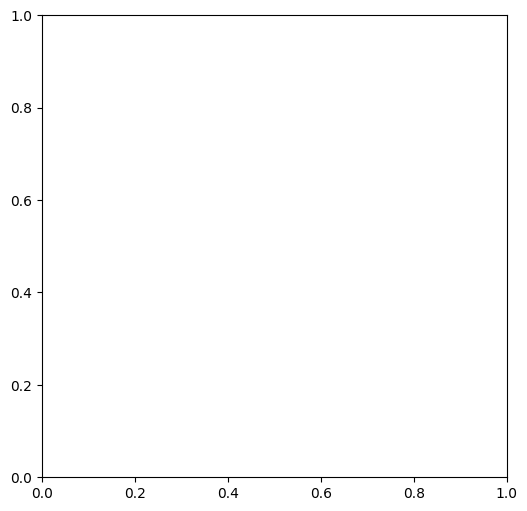

In [6]:
from experiments.utils.miscellaneous import smooth_running_mean,calculate_I1,calculate_I2

import pandas as pd
from scipy.stats import stats
import seaborn as sns
from experiments.utils.miscellaneous import calculate_I1, calculate_I2
from scipy.interpolate import splrep, PPoly, PchipInterpolator
from experiments.utils.miscellaneous import calculate_I2, calculate_I1

# and some y distances
plt.style.use("default")
fig, ax = plt.subplots(figsize=(6,6))


forget_log_y = np.log(1/distances_y)
points = np.array([ np.arange(len(distances_y)),forget_log_y]).T


angle = -(np.pi/2 - np.arctan((len(forget_log_y)-1)/ (forget_log_y[-1] - forget_log_y[0])))

# rotation matrix
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
translated_points = points - np.array([0,forget_log_y[0]])
# ax.scatter(translated_points[:,0],translated_points[:,1] , c='black' )

rotated = np.array([rotation_matrix @ point for point in translated_points])

# ax.scatter(rotated[:,0], rotated[:,1], c='black', zorder=20)



rotation_matrix2 = np.array([[np.cos(-angle), -np.sin(-angle)], [np.sin(-angle), np.cos(-angle)]])
# rotated_back = np.array([rotation_matrix2 @ point for point in rotated])
# translated_back = rotated_back + np.array([forget_log_x[0], 0])

# ax.scatter(translated_back[:,0], translated_back[:,1], c='black', zorder=20)

# plot translated line
# translated_linse_points = closest_points
# translated_linse_points[:,0] = translated_linse_points[:,0] - forget_log_x[0]

# ax.scatter(translated_linse_points[:,0], translated_linse_points[:,1], c='g')

# plot rotated line
# rotated_line_points = np.array([rotation_matrix @ point for point in translated_linse_points])
# ax.scatter(rotated_line_points[:,0], rotated_line_points[:,1], c='b')



# fit a spline

cubic_spline = PchipInterpolator(rotated[:,0], rotated[:,1])

x_sp_rotated = np.linspace(rotated[0,0], rotated[-1,0], 1000)
y_sp_rotated = cubic_spline(x_sp_rotated)
# ax.hlines(0, rotated[0,0], rotated[-1,0], color='black', linestyles='--')
# ax.plot(x_sp_rotated,y_sp_rotated, c='b')




# print(f" roots {cubic_spline.roots()}")
# print(f"rotated first {rotated[0]}")
# print(f"rotated last {rotated[-1]}")
# ax.plot(x,y, c='b')


tck = splrep(rotated[:,0],rotated[:,1], s=0)
ppoly = PPoly.from_spline(tck)
roots  = ppoly.roots(extrapolate=False)

all_roots = roots if np.allclose(roots[-1], rotated[-1, 0]) else np.append(roots, rotated[-1, 0])
all_roots = all_roots if np.isclose(all_roots[0],0) else np.insert(all_roots, 0, [0, 0])
# print(f" safer roots, no extrapolation {all_roots}")

areas = np.array([cubic_spline.integrate(all_roots[i],all_roots[i+1] ) for i in range(len(all_roots)-1)])
triangle_area = 0.5*np.abs((len(forget_log_y)-1)*(forget_log_y[-1] - forget_log_y[0]))


# print(f" areas {areas}")
# print(f" triangle area {triangle_area}")
print(f" manual I2 {np.sum(areas)/triangle_area}")

I2 = calculate_I2(input_step_counts=np.arange(len(distances_y)), input_errors=distances_y)
print(f" I2 auto {I2}")


# rotate roots to have points of intersection with the line
# plt the translated line with the intersection points
rotated_roots = np.array([rotation_matrix2 @ np.array([root,0]) for root in all_roots])
# ax.scatter(translated_points[:,0], translated_points[:,1], c='r' )
# ax.scatter(rotated_roots[:,0], rotated_roots[:,1], c='orange', zorder=20)


# plot the original curve and the intersection points


# fit a spline to the original curve




## STRAIGHT LINE

# shade areas above in red
# ys_line = slope * (x + forget_log_x[0]) + intercept
# ax.plot(x, ys_line, c='black', alpha=0.3, ls="--")
# print(f" rotated translated roots {translated_roots}")
# manually shade each are with appropriate colour


# plot the original secant line
# ax.plot(x_og, og_slope * x_og + og_intercept, c='black', alpha=0.8, ls="--", label="Secant line")


translated_roots = rotated_roots + np.array([0,distances_y[0]])
# ax.scatter(points[:,0], points[:,1], c='r' )

# ax.scatter(forget_log_x, np.arange(len(errors)), c='r' )
# ax.scatter(rotated_translated_roots[:,0], rotated_translated_roots[:,1], c='orange', zorder=20)

# plt.axis('equal')

ax.scatter(points[:,0], points[:,1], c='darkblue' , zorder=20)
# ax.scatter(translated_roots[:,0], translated_roots[:,1], c='orange', zorder=20)

og_spline = PchipInterpolator(points[:,0], points[:,1])
x_og = np.linspace(points[0,0], points[-1,0], 1000)
y_og = og_spline(x_og)

ax.plot(x_og,y_og, c='black', alpha= 0.8, ls="--", label="PCHIP interpolator fit")


## STRAIGHT LINE


og_slope = (forget_log_y[-1] - forget_log_y[0])/(len(forget_log_y)-1)
og_intercept = forget_log_y[0]


# shade areas above in red
x_straight_og = np.linspace(points[0,0], points[-1,0], 1000)
ax.plot(x_straight_og, x_straight_og*og_slope+ og_intercept, c='black', alpha=0.3, ls="--")
# print(f" rotated translated roots {translated_roots}")
# manually shade each are with appropriate colour



i1 = calculate_I1(distances_y)
i2 = calculate_I2(input_step_counts=np.arange(len(distances_y)), input_errors=distances_y)
print(f" I2 {i2}")
print(f" I1 {i1}")
# ax.scatter(forget_log_x, np.arange(len(errors)), c='r' )
# ax.scatter(rotated_translated_roots[:,0], rotated_translated_roots[:,1], c='orange', zorder=20)



# plt.axis('equal')

ax.set_xlabel("Iterations")
ax.set_ylabel("$\log(1/\\varepsilon)$")

ax.legend()
ax.invert_yaxis()


In [ ]:
# plot y distance ratios

from experiments.utils.miscellaneous import smooth_running_mean,calculate_I1,calculate_I2

# and some y distances
plt.style.use("default")

fig, ax = plt.subplots(figsize=(8,8))

condition = 0

count_close_to_zero = 0
count_far_from_zero = 0





s = distances_y
extracted = s[s!=0]
print(np.log(1/extracted))

if len(extracted)>3:


    # simple_ratios = extracted[1:]/extracted[:-1]
    # numerator = np.log(extracted[2:]/extracted[1:-1])
    # denominator = np.log(extracted[1:-1]/extracted[:-2]) + 1e-15
    # # # print(diffs)
    # order = numerator/denominator

    # print(f" order shape {order.shape}")
    # smoothed_order = smooth_running_mean(order, 4, geometric=True)
    # max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]

    ax.scatter(np.arange((len(extracted)-1)), np.log(extracted[1:] - np.log(extracted[:-1])), c='r' )
    # ax.scatter(denominator, numerator, c='r')
    # ax.plot(np.arange(len(simple_ratios)), simple_ratios )
    # ax.plot(np.arange(len(order)), order )
    # ax.plot(np.arange(len(smoothed_order)), smoothed_order )

    # ax.scatter(extracted[1:], extracted[:-1])

ax.set_xscale("log")
# ax.set_yscale("log")
i2 = calculate_I2(np.arange(len(extracted)), 1/extracted)
ax.set_xlabel("1/error")
# ax.set_ylabel("Ratio of logs of differences successive errors")
ax.set_ylabel("Iterations")
ax.set_title(f"Numer of iterations as a function of error; $I_2$ is {i2:.2f}")

# print(f"count close to zero: {count_close_to_zero}")
# print(f"count far from zero: {count_far_from_zero}")
# ax.set_ylim(0.4, 12.0)


**Now plot fitting a spline**

In [ ]:
from scipy.interpolate import CubicSpline

from experiments.utils.miscellaneous import smooth_running_mean,calculate_I1,calculate_I2

# and some y distances
plt.style.use("default")

fig, ax = plt.subplots(figsize=(8,8))

condition = 0

count_close_to_zero = 0
count_far_from_zero = 0





# s = distances_y
# extracted = s[s!=0]
with open(r"C:\Users\Owner\Desktop\MastersProject\experiments\initial_demos\y_distances.npy", 'rb') as f:
    extracted = np.load(f)




simple_ratios = extracted[1:]/extracted[:-1]
numerator = np.log(extracted[2:]/extracted[1:-1])
denominator = np.log(extracted[1:-1]/extracted[:-2]) + 1e-15
# # print(diffs)
order = numerator/denominator

# print(f" order shape {order.shape}")
# smoothed_order = smooth_running_mean(order, 4, geometric=True)
# max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]
forget_log_x = np.log(1/extracted)

cubic_spline = CubicSpline(forget_log_x,np.arange(len(extracted)))
#
x_sp = np.linspace(forget_log_x[0],forget_log_x[-1], 500)



ax.scatter(forget_log_x, np.arange(len(extracted)), c='r' )
ax.plot(x_sp, cubic_spline(x_sp), c='r', alpha=0.5)
# ax.plot(x_sp, cubic_spline(x_sp,1), c="orange")
# ax.plot(x_sp, cubic_spline(x_sp,2), c="purple")
# ax.scatter(denominator, numerator, c='r')
# ax.plot(np.arange(len(simple_ratios)), simple_ratios )
# ax.plot(np.arange(len(order)), order )
# ax.plot(np.arange(len(smoothed_order)), smoothed_order )

# ax.scatter(extracted[1:], extracted[:-1])

# ax.set_xscale("log")
# ax.set_yscale("log")
i2 = calculate_I2(np.arange(len(extracted)), 1/extracted)
ax.set_xlabel("1/error")
# ax.set_ylabel("Ratio of logs of differences successive errors")
ax.set_ylabel("Iterations")
ax.set_title(f"Numer of iterations as a function of error; $I_2$ is {i2:.2f}")

# print(f"count close to zero: {count_close_to_zero}")
# print(f"count far from zero: {count_far_from_zero}")
# ax.set_ylim(0.4, 12.0)

<h1> and some x distances</h1>

In [ ]:
# and some x distances
plt.style.use("default")
number_to_plot = 3

fig, ax = plt.subplots(figsize=(8,8))

condition = 0

count_close_to_zero = 0
count_far_from_zero = 0

for i in range(number_to_plot):

    s = distances_x
    extracted = s[s!=0]
    # print(extracted)

    if len(extracted)>3:


        simple_ratios = extracted[1:]/extracted[:-1]
        numerator = np.log(extracted[2:]/extracted[1:-1])
        denominator = np.log(extracted[1:-1]/extracted[:-2]) + 1e-15
        # # print(diffs)
        order = numerator/denominator

        # print(f" order shape {order.shape}")
        smoothed_order = smooth_running_mean(order, 4, geometric=True)
        max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]

        # ax.plot(np.arange(len(extracted)), extracted )
        # ax.plot(np.arange(len(extracted)), 1/extracted )
        # ax.plot(np.arange(len(simple_ratios)), simple_ratios )
        # ax.plot(np.arange(len(smoothed_order)), smoothed_order )
        ax.scatter(extracted[1:], extracted[:-1])



ax.set_yscale("log")
ax.set_xscale("log")
# print(f"count close to zero: {count_close_to_zero}")
# print(f"count far from zero: {count_far_from_zero}")
# ax.set_ylim(0.4, 12.0)

<h1>and some gradients</h1>

In [ ]:
# finally some gradients

# and some y distances
plt.style.use("default")
number_to_plot = 3

fig, ax = plt.subplots(figsize=(8,8))

condition = 0

count_close_to_zero = 0
count_far_from_zero = 0

for i in range(number_to_plot):

    s = gradients
    extracted = s[s!=0]

    # print(gradients)

    if len(extracted)>3:


        simple_ratios = extracted[1:]/extracted[:-1]
        numerator = np.log(extracted[2:]/extracted[1:-1])
        denominator = np.log(extracted[1:-1]/extracted[:-2]) + 1e-15
        # # print(diffs)
        order = numerator/denominator

        # print(f" order shape {order.shape}")
        smoothed_order = smooth_running_mean(order, 4, geometric=True)
        max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]

        # ax.plot(np.arange(len(extracted)), extracted )
        # ax.plot(np.arange(len(simple_ratios)), simple_ratios )
        # ax.plot(np.arange(len(smoothed_order)), smoothed_order )
        # ax.plot(np.arange(len(extracted)), 1/extracted )




# print(f"count close to zero: {count_close_to_zero}")
# print(f"count far from zero: {count_far_from_zero}")
# ax.set_ylim(0.4, 12.0)

# Do mulitple

In [ ]:
# Do mulitple

repeats = 100


max_steps = 100000
epsilons = 10 ** np.linspace(-0.5, -6, 60)
bounds =[-1,1]
sw = StrongWolfe()
mt = MoreThuente()
const = Constant(0.01)

stopping_conditions = ["grad", "x", "y"]


dim =4
degree =2


stopping_condition = stopping_conditions[0]
# l1 = np.max(np.abs(np.linalg.eigvals(h())))
record_trace = True





fig,ax = plt.subplots()
for repeat in range(repeats):

    x0 = np.random.rand(dim)
    f,g,h = PolynomialGenerator().generate(dim, degree, all_positive=False)

    counts = np.zeros(len(epsilons))
    cum_step_count = 0
    start = x0
    for i,e in enumerate(epsilons):

        if i == len(epsilons)-1:
            print("last iteration")
            record_trace = True

            res = grad_descent(f,g,x0,epsilon=e, record_trace=record_trace, record_gradients=record_trace,record_objective_values=record_trace, learning_rate=const, constraints=bounds, termination_criterion=stopping_condition,max_steps=max_steps)
            counts[i] = res[1]
        else:
            record_trace = False
            res = grad_descent(f,g,start,epsilon=e, record_trace=record_trace, record_gradients=record_trace,record_objective_values=record_trace, learning_rate=const, constraints=bounds, termination_criterion=stopping_condition, max_steps=max_steps)
            cum_step_count += res[1]
            counts[i] = cum_step_count

        start = res[4]
        print(f"finished {i} out of {len(epsilons)}")


    objective_values = res[6]
    s = np.abs(objective_values[:-1] - objective_values[-1])
    extracted = s[s!=0]

    if len(extracted)>3:


        # simple_ratios = extracted[1:]/extracted[:-1]
        # numerator = np.log(extracted[2:]/extracted[1:-1])
        # denominator = np.log(extracted[1:-1]/extracted[:-2]) + 1e-15
        # # print(diffs)
        # order = numerator/denominator

        # print(f" order shape {order.shape}")
        # smoothed_order = smooth_running_mean(order, 4, geometric=True)
        # max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]

        # ax.scatter(np.arange(len(extracted)), 1/extracted, c='r' )
        # ax.scatter(denominator, numerator, c='r')
        # ax.plot(np.arange(len(simple_ratios)), simple_ratios )
        # ax.plot(np.arange(len(order)), order )
        # ax.plot(np.arange(len(smoothed_order)), smoothed_order )
        ax.scatter(extracted[1:], extracted[:-1])

        # ax.scatter(extracted[1:], extracted[:-1])

    ax.set_xscale("log")
    ax.set_yscale("log")
